**In this project I have make a model for the Fraud Detection in credit card. It's a classification problem with a highly unbalanced data. So, first I apply some data preprocessing and apply undersampling. Then, train our model with SVM Classifier.**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import seaborn as sns
%matplotlib inline

In [2]:
# Import the dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.758743e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.252298e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.636929e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.316157e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.591952e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.247354e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.050180e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.693344e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179712e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


### Check the relation of amount fraud w.r.t., to time

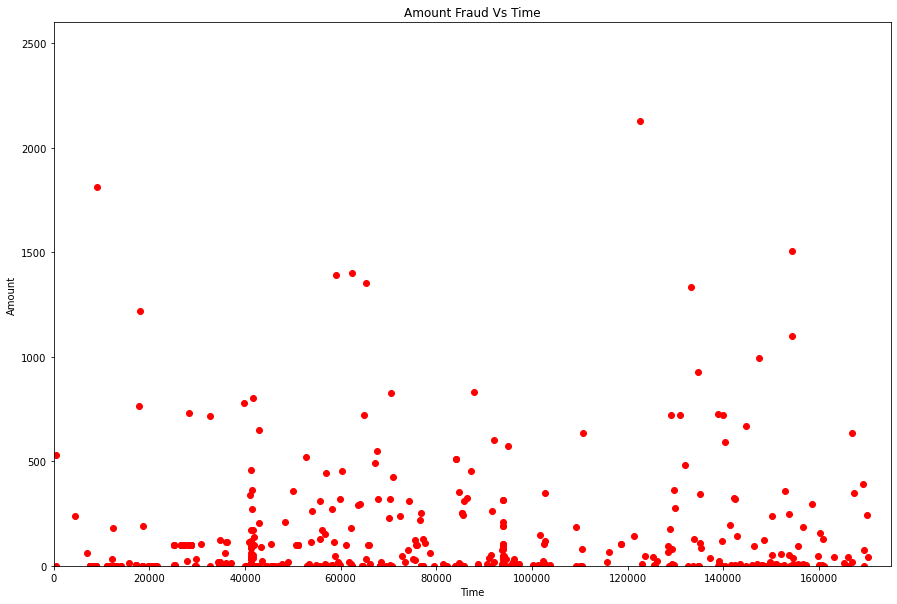

In [7]:
df_fraud= df[df.Class == 1]  ## Select all the frauded data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount'],c='red')
plt.title('Amount Fraud Vs Time')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2600]);

Observation: We can observe the time doesn't impact the frequency of frauds. Moreover, the majority of frauds are small amount 

In [8]:
# Number of bif fraud i.e., fraud amount is greater than 1000
big_fraud = df_fraud[df_fraud.Amount >= 1000].shape[0]
print('There are only', big_fraud, 'big frauds in our data out of the', len(df_fraud), 'frauds')


There are only 9 big frauds in our data out of the 492 frauds


## Data preprocessing

### Unbalanced dataset

In [9]:
fraud = len(df_fraud)
non_fraud = len(df[df.Class == 0])
print('In our dataset we have', fraud, 'fraud transition and', non_fraud, 'number of non fraud transitions.' )

In our dataset we have 492 fraud transition and 284315 number of non fraud transitions.


We can see our data is highly unbalanced which means using the data as it is might result in unwanted behaviour from a supervised classifier.

It means if we train our model with data then it's most probabily give us a maximum prediction in a category of the non-fraud data even to fraud one also.

In [10]:
print("The accuracy of the classifier then would be :", (284315-492)/284315, "which is the number of good classification over the number of tuple to classify")

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


**Solution:** The solution of our problem is that we could use the oversampling principle or the undersampling principle The undersampling principle should be used only if we can be sure that the selected few tuples (in this case non-fraud) are representative of the whole non-fraud transactions of the dataset. 

### Correlated features

In [11]:
df_corr = df.corr()
# df_corr

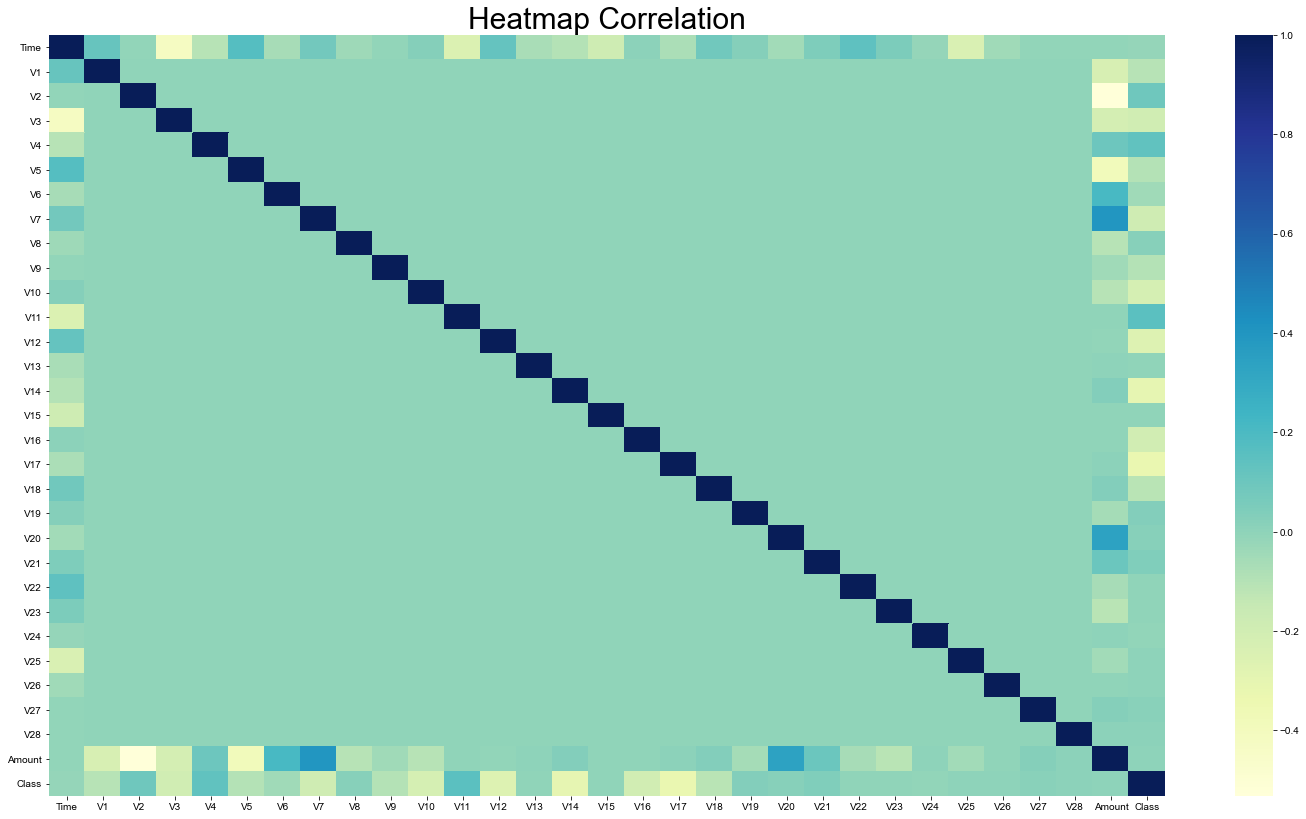

In [12]:
plt.figure(figsize=(25,14))
sns.heatmap(df_corr, cmap="YlGnBu")
sns.set(font_scale=2.5, style='white')

plt.title('Heatmap Correlation');

**Observations:** As we can notice, most of the features are not correlated with each other. This corroborates the fact that a PCA was previously performed on the data.

What can generally be done on a massive dataset is a dimension reduction. By picking th emost important dimensions, there is a possiblity of explaining most of the problem, thus gaining a considerable amount of time while preventing the accuracy to drop too much.

However in this case given the fact that a PCA was previously performed, if the dimension reduction is effective then the PCA wasn't computed in the most effective way. Another way to put it is that no dimension reduction should be computed on a dataset on which a PCA was computed correctly.

In [13]:
rank = df_corr['Class']

df_rank = pd.DataFrame(rank)
df_rank = np.abs(df_rank).sort_values(by='Class', ascending=False)  ## Ranking the absolute value of the coefficients
                                                                     ## in desending order
df_rank.dropna(inplace=True) # Removing Missing Data (not a number)

### Feature Selection: Oversampling

One way to do oversampling is to replicate the under-presented class tuples until we attain a correct proportion between the class.

However as we haven't infinite time nor the patience, we are going to run the classifier with the undersampled training data(for those using the undersampling principle if results are really bad just rerun the training dataset definition)

In [14]:
# We seperate ours data in two groups : a train dataset and a test dataset

# First we build our train dataset
df_train_all = df[0:150000] # We cut in two the original dataset
df_train_1 = df_train_all[df_train_all['Class'] == 1] # We seperate the data which are the frauds and the no frauds
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have ' + str(len(df_train_1)) +" frauds so we need to take a similar number of non-fraud")


In this dataset, we have 293 frauds so we need to take a similar number of non-fraud


In [15]:
df_sample = df_train_0.sample(300)  # Take a 300 samples of the class 0 i.e., non fraud transitions  
df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds. 

df_train = df_train.sample(frac=1) # Then we mix our dataset

In [16]:
X_train = df_train.drop(['Time','Class'], axis=1)
y_train = df_train['Class']
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
print(len(X_train), len(y_train))

593 593


In [17]:
############################## with all the test dataset to see if the model learn correctly ##################
df_test_all = df[150000:]

X_test = df_test_all.drop(['Time', 'Class'],axis=1)
y_test = df_test_all['Class']
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


## Model Selection

In [18]:
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [19]:
# # We set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)
svm_classifier = SVC(kernel='linear')

In [20]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

## Testing the model

In [21]:
y_pred = svm_classifier.predict(X_test)

In [22]:
score = accuracy_score(y_test, y_pred)
score

0.9284013441438501

In [23]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[124971,   9637],
       [    15,    184]], dtype=int64)

In [24]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    134608
           1       0.02      0.92      0.04       199

    accuracy                           0.93    134807
   macro avg       0.51      0.93      0.50    134807
weighted avg       1.00      0.93      0.96    134807



In this case we are gonna try to minimize the number of errors in our prediction results. Errors are on the anti-diagonal of the confusion matrix. But we can infer that being wrong about an actual fraud is far worse than being wrong about a non-fraud transaction.

That is why using the accuracy as only classification criterion could be considered unthoughtful. During the remaining part of this study our criterion will consider precision on the real fraud 4 times more important than the general accuracy. Even though the final tested result is accuracy.

In [25]:
print('We have detected ' + str(conf_mat[1][1]) + ' frauds / ' + str(conf_mat[1][1]+conf_mat[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(conf_mat[1][1]/(conf_mat[1][1]+conf_mat[1][0])))
print("the accuracy is : "+str((conf_mat[0][0]+conf_mat[1][1]) / (sum(conf_mat[0]) + sum(conf_mat[1]))))

We have detected 184 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9246231155778895
the accuracy is : 0.9284013441438501
